In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

from tqdm import tqdm

/Users/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
ds_cdd = xr.open_dataset("../era5/era5-nordics-ecacdd.nc")
ds_cwd = xr.open_dataset("../era5/era5-nordics-ecacwd.nc")
ds_pd = xr.open_dataset("../era5/era5-nordics-ecapd.nc")
ds_rr1 = xr.open_dataset("../era5/era5-nordics-ecarr1.nc")
ds_rx1day = xr.open_dataset("../era5/era5-nordics-ecarx1day.nc")
ds_rx5day = xr.open_dataset("../era5/era5-nordics-ecarx5day.nc")
ds_sdii = xr.open_dataset("../era5/era5-nordics-ecasdii.nc")

In [4]:
lons, lats = np.meshgrid(ds_cdd.longitude, ds_cdd.latitude)

In [5]:
lons

array([[ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       ...,
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ]], dtype=float32)

In [6]:
psr = xr.open_dataset("pine_spruce.nc")

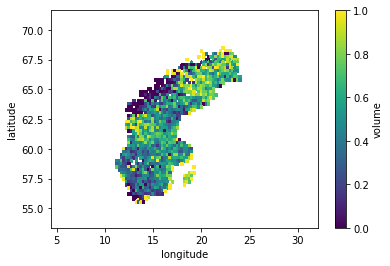

In [7]:
psr.volume.plot()

In [8]:
df = pd.DataFrame()

In [9]:
data = {
    "ratio": psr.volume.values.ravel()
}

In [10]:
data.keys()

dict_keys(['ratio'])

In [11]:
data["cdd"] = ds_cdd.number_of_cdd_periods_with_more_than_5days_per_time_period.values.ravel()

In [12]:
data["cwd"] = ds_cwd.number_of_cwd_periods_with_more_than_5days_per_time_period.values.ravel()

In [13]:
data["pd"] = ds_pd.precipitation_days_index_per_time_period.values.ravel()

In [14]:
data["rr1"] = ds_rr1.wet_days_index_per_time_period.values.ravel()

In [15]:
data["rx1day"] = ds_rx1day.highest_one_day_precipitation_amount_per_time_period.values.ravel()

In [16]:
data["rx5day"] = ds_rx5day.highest_five_day_precipitation_amount_per_time_period.values.ravel()

In [17]:
data["sdii"] = ds_sdii.simple_daily_intensity_index_per_time_period.values.ravel()

In [18]:
df = pd.DataFrame(data)

In [20]:
df.head()

,ratio,cdd,cwd,pd,rr1,rx1day,rx5day,sdii
0,NaN,118.0,221.0,4157.0,4157.0,64.8069,64.8069,4.414824
1,NaN,122.0,212.0,4134.0,4134.0,64.8069,64.8069,4.450780
2,NaN,116.0,214.0,4122.0,4122.0,64.8069,64.8069,4.475977
3,NaN,113.0,212.0,4121.0,4121.0,64.8069,64.8069,4.441460
4,NaN,114.0,213.0,4117.0,4117.0,64.8069,64.8069,4.403867


In [21]:
df1 = df.dropna(inplace=False)

In [22]:
df1 = df[df["ratio"] > 0]

In [23]:
df1.columns[1:]

Index(['cdd', 'cwd', 'pd', 'rr1', 'rx1day', 'rx5day', 'sdii'], dtype='object')

In [24]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df1[df1.columns[1:]], df1["ratio"])

In [26]:
X_train

,cdd,cwd,pd,rr1,rx1day,rx5day,sdii
4928,223.0,63.0,2560.0,2560.0,64.806900,64.806900,5.536966
2292,250.0,49.0,2485.0,2485.0,64.806900,64.806900,5.455530
5249,218.0,100.0,2761.0,2761.0,64.806900,64.806900,6.330444
2605,194.0,91.0,2895.0,2895.0,64.806900,64.806900,5.564933
1953,219.0,68.0,2679.0,2679.0,64.806900,64.806900,5.336575
4937,233.0,46.0,2441.0,2441.0,64.806900,64.806900,5.273360
5362,216.0,84.0,2699.0,2699.0,64.806900,64.806900,6.207129
6372,219.0,56.0,2648.0,2648.0,64.806900,64.806900,5.525010
4709,207.0,75.0,2753.0,2753.0,64.806900,64.806900,5.651465
3167,223.0,60.0,2551.0,2551.0,64.806900,64.806900,5.309511


In [37]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
mean_squared_error(y_test, y_pred)

0.0539913551799052

In [40]:
r2_score(y_test, y_pred)

0.19724878556796643

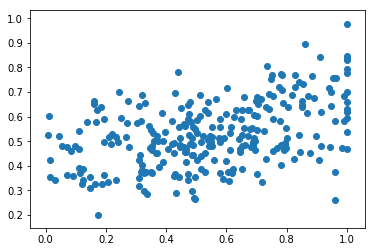

In [41]:
plt.scatter(y_test, y_pred)

In [42]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [43]:
df_results

,observed,predicted
3274,0.685934,0.552975
5272,0.515966,0.438878
4589,0.458427,0.570555
3474,0.173967,0.201797
2401,0.731787,0.425903
3927,0.220850,0.528938
5265,0.425134,0.453270
4138,1.000000,0.699654
2728,0.915016,0.616852
5931,0.696260,0.466028


In [44]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [45]:
feature_importances

,importance
sdii,0.316114
cwd,0.193597
cdd,0.187251
rr1,0.145466
pd,0.145158
rx1day,0.006255
rx5day,0.006159


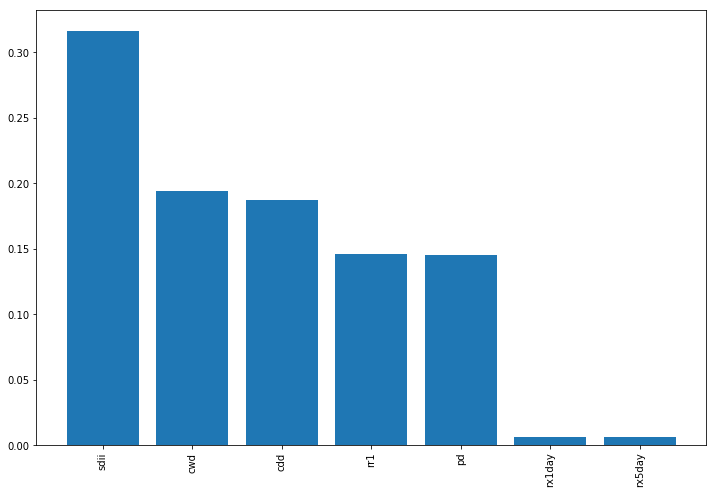

In [46]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()

# Spruce - Classifier

In [47]:
ds_spruce = xr.open_dataset("spruce.nc")

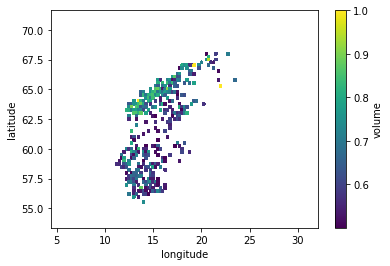

In [48]:
ds_spruce.volume.where(ds_spruce.volume > 0.5).plot()

In [49]:
df2 = df.copy()
df2["ratio"] = ds_spruce.volume.where(ds_spruce.volume > 0.5).values.ravel()
df2["predominant"] = df2.apply(lambda r: 0 if np.isnan(r["ratio"]) else 1, axis=1)
df2.head()

,ratio,cdd,cwd,pd,rr1,rx1day,rx5day,sdii,predominant
0,NaN,118.0,221.0,4157.0,4157.0,64.8069,64.8069,4.414824,0
1,NaN,122.0,212.0,4134.0,4134.0,64.8069,64.8069,4.450780,0
2,NaN,116.0,214.0,4122.0,4122.0,64.8069,64.8069,4.475977,0
3,NaN,113.0,212.0,4121.0,4121.0,64.8069,64.8069,4.441460,0
4,NaN,114.0,213.0,4117.0,4117.0,64.8069,64.8069,4.403867,0


In [77]:
X = df2[df2.columns[1:7]]
y = df2["predominant"]

In [78]:
rus = RandomUnderSampler(random_state=1234)

In [79]:
rus.fit(X, y)

RandomUnderSampler(random_state=1234, ratio=None, replacement=False,
          return_indices=False, sampling_strategy='auto')

In [80]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [82]:
rf2 = RandomForestClassifier(n_estimators=500, max_depth=15)

In [83]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
y_pred = rf2.predict(X_test)

In [85]:
accuracy_score(y_pred, y_test)

0.6353591160220995

In [86]:
confusion_matrix(y_pred, y_test)

array([[52, 36],
       [30, 63]])

In [87]:
feature_importances = pd.DataFrame(rf2.feature_importances_,
                                   index = df2.columns[1:7],
                                   columns=['importance']).sort_values('importance', ascending=False)

In [88]:
feature_importances

,importance
cwd,0.249920
rr1,0.247982
cdd,0.240704
pd,0.232411
rx1day,0.014543
rx5day,0.014440


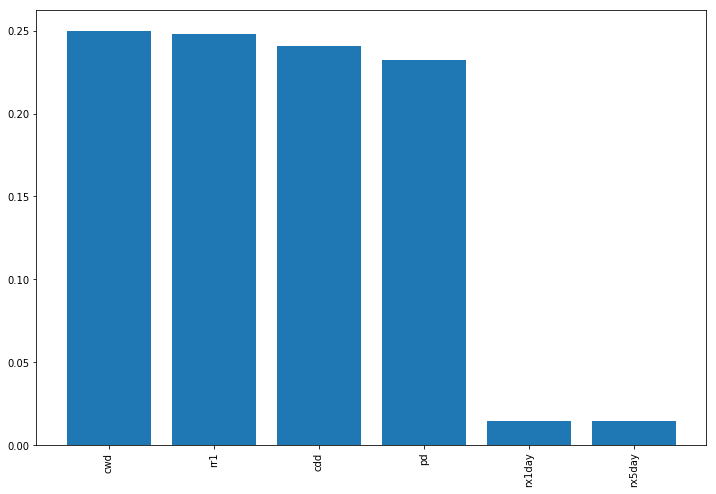

In [89]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()

# Pine - Classifier

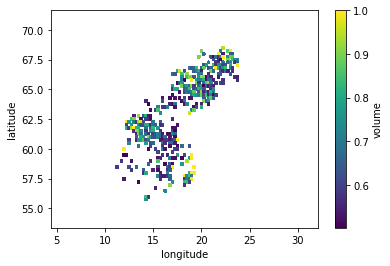

In [90]:
ds_pine = xr.open_dataset("pine.nc")
ds_pine.volume.where(ds_pine.volume > 0.5).plot()

In [91]:
df3 = df.copy()
df3["ratio"] = ds_pine.volume.where(ds_spruce.volume > 0.5).values.ravel()
df3["predominant"] = df3.apply(lambda r: 0 if np.isnan(r["ratio"]) else 1, axis=1)
df3.head()

,ratio,cdd,cwd,pd,rr1,rx1day,rx5day,sdii,predominant
0,NaN,118.0,221.0,4157.0,4157.0,64.8069,64.8069,4.414824,0
1,NaN,122.0,212.0,4134.0,4134.0,64.8069,64.8069,4.450780,0
2,NaN,116.0,214.0,4122.0,4122.0,64.8069,64.8069,4.475977,0
3,NaN,113.0,212.0,4121.0,4121.0,64.8069,64.8069,4.441460,0
4,NaN,114.0,213.0,4117.0,4117.0,64.8069,64.8069,4.403867,0


In [92]:
X = df3[df3.columns[1:7]]
y = df3["predominant"]

In [93]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [95]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
y_pred = rf2.predict(X_test)

In [97]:
accuracy_score(y_pred, y_test)

0.6961325966850829

In [98]:
confusion_matrix(y_pred, y_test)

array([[61, 31],
       [24, 65]])

In [99]:
feature_importances = pd.DataFrame(rf2.feature_importances_,
                                   index = df2.columns[1:7],
                                   columns=['importance']).sort_values('importance', ascending=False)

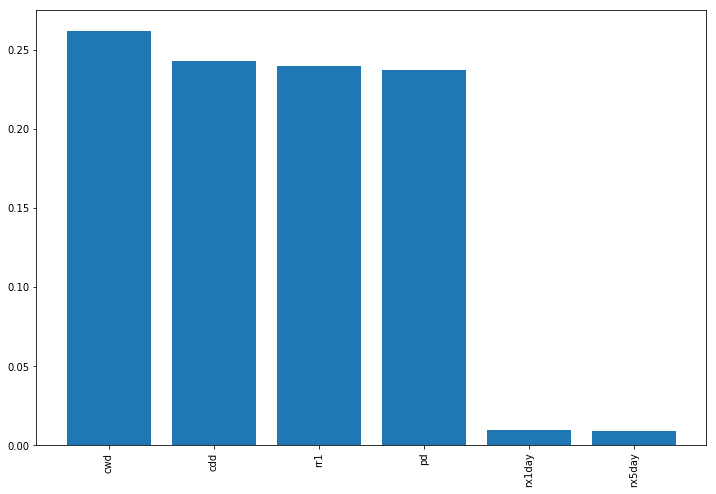

In [100]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()